In [86]:
%pip install scikit-learn
%pip install seaborn

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score, roc_auc_score

from sklearn.metrics import roc_curve, auc

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV, KFold

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


El objetivo del dataset es ver las estafas/fraudes de tarjetas de credito  ver las diferentes caracteristicas de las personas que fueron estafadas y las que no. Nosotros buscamos predecir TARGET(si fue o no estafada) y buscar una relacion con las diferentes columnas.

In [87]:
# https://www.kaggle.com/datasets/mishra5001/credit-card

credit_ds = pd.read_csv("application_data.csv")

credit_ds

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
credit_ds.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

El dataset cuenta con columnas como CODE_GENDER (el genero), NAME_CONTRACT TYPE (que indica si fue un prestamo de efectivo o un prestamo revolvente), CNT_CHILDREN (cantidad de hijos), etc. Con todo esto se busca establecer patrones y poder hacer que los modelos sean capaces de interpretarlos y predecir TARGET con exito

Limpio el dataset para que no haya filas con valores null

In [89]:
#Me fijo cuantas veces aparece el 1 y el 0 en la columna TARGET
print(credit_ds['TARGET'].value_counts())

#Elimino valores null
credit_ds_clean = credit_ds.dropna()

#creo dos sub-datasets, uno para donde TARGET es 0 y otro para cuando es 1
class_0 = credit_ds_clean[credit_ds_clean['TARGET'] == 0]
class_1 = credit_ds_clean[credit_ds_clean['TARGET'] == 1]
print(class_0.shape[0], class_1.shape[0])

#Me fijo cuantas filas tiene 
cant_1 = class_1.shape[0]


# Agarro misma cantidad de 1 y 0 para que el nuevo dataset este balanceado
class_0_sample = class_0.sample(n=cant_1, random_state=42)  
class_1_sample = class_1.sample(n=cant_1, random_state=42) 

# Combino ambos sub-datasets en uno nuevo y los mezclo 
balanced_ds = pd.concat([class_0_sample, class_1_sample])
balanced_ds = balanced_ds.sample(frac=1, random_state=42).reset_index(drop=True)

# Me fijo nuevamente cuantas muestras hay de 1 y 0 en TARGET para ver si se filtro bien
print(balanced_ds['TARGET'].value_counts())
balanced_ds

TARGET
0    282686
1     24825
Name: count, dtype: int64
8076 526
TARGET
0    526
1    526
Name: count, dtype: int64


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,406420,0,Revolving loans,M,Y,Y,1,67500.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
1,296707,1,Revolving loans,F,Y,Y,0,94500.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,145273,0,Cash loans,M,Y,N,0,387000.0,1575000.0,65128.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
3,433095,1,Cash loans,F,Y,Y,0,126000.0,173196.0,14809.5,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,2.0
4,313040,0,Cash loans,M,Y,N,0,157500.0,135000.0,9823.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,213769,0,Cash loans,M,Y,Y,0,180000.0,528633.0,39654.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
1048,446521,0,Cash loans,F,Y,Y,2,225000.0,1886850.0,52015.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
1049,289833,0,Cash loans,M,Y,Y,0,180000.0,553806.0,26770.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1050,415270,1,Revolving loans,M,Y,Y,1,270000.0,810000.0,40500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Exploracion del dataset

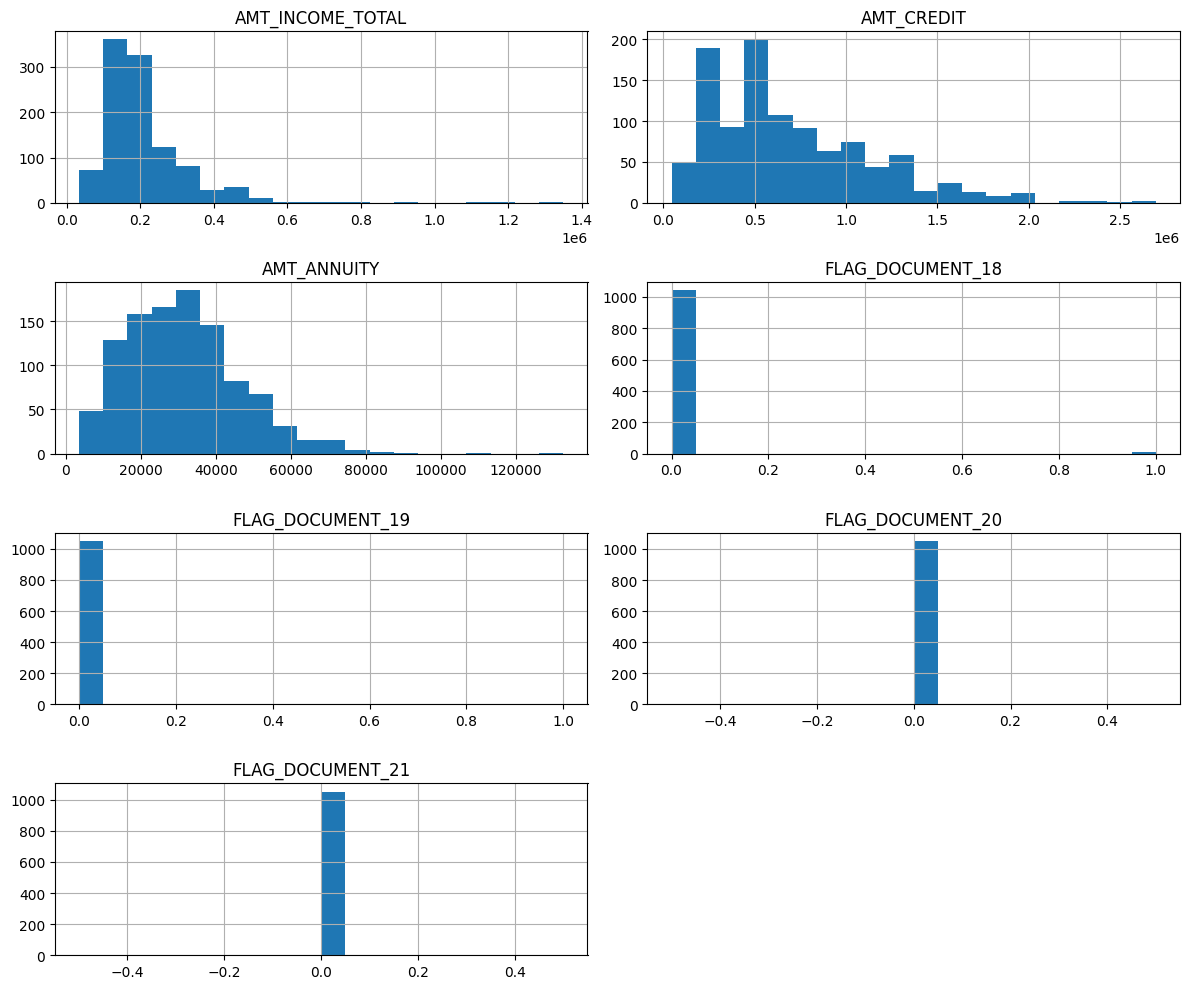

In [90]:
# Seleccionar ciertas columnas
columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

# Crear subplots de histogramas para cada columna
balanced_ds[columns].hist(figsize=(12, 10), bins=20, layout=(4, 2))

# Ajustar el layout y mostrar los gráficos
plt.tight_layout()
plt.show()

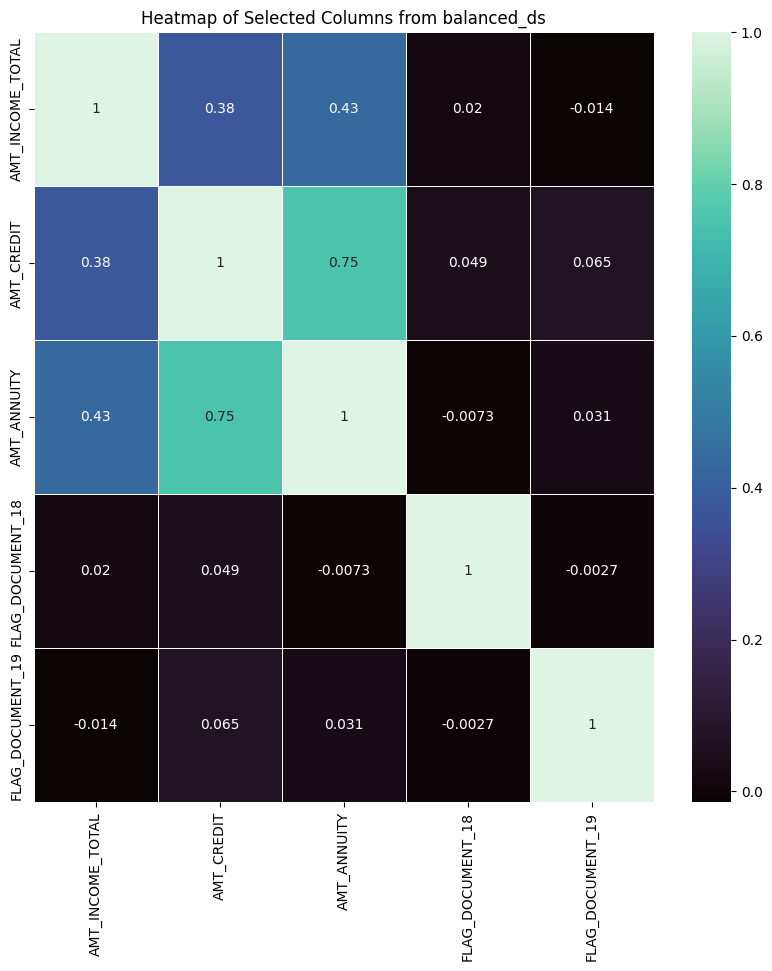

In [91]:
# guardo la matriz de correlacion
cm = balanced_ds[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19']].corr()

# la muestro en un heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, ax=ax, cmap="mako", annot=True, linewidths=0.5)
plt.title('Heatmap of Selected Columns from balanced_ds')
plt.show()

In [92]:
# Filtro mi dataset para quedarme solo con los datos que son numericos

numeric_credit_ds = balanced_ds.select_dtypes(include='number')

Regresion logistica sin atributos categoricos

In [93]:
#Divido el dataset numerico en X (valores CON LOS QUE predecir) e Y (valor A predecir)

X_df = numeric_credit_ds.drop(columns=['TARGET']) 

y_df = numeric_credit_ds[['TARGET']]

X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_df, test_size=0.2, random_state=42
)

In [94]:
#Creo el modelo de regresion logica

RL_num = LogisticRegression()
RL_num.fit(X_train, y_train)
y_pred = RL_num.predict(X_test)

C:\Users\mamak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mamak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
#Calculo el error cuadratico

mse = mean_squared_error(y_test, y_pred)
mse

np.float64(0.4597156398104265)

In [96]:
#Calculo el coeficiente

print("Coefficients:", RL_num.coef_)
print("Intercept:", RL_num.intercept_)

Coefficients: [[ 1.22683358e-06 -4.44584840e-08 -2.77004804e-06  1.89241829e-06
   2.67327586e-05 -2.42665492e-06 -1.58665274e-10  7.11950716e-06
   1.80771056e-04 -3.65067489e-05  2.65087911e-05  7.53184496e-07
   9.42605338e-09  9.42605338e-09  3.80339851e-08  9.58202773e-09
   1.90330462e-08  2.38748116e-08 -6.61555263e-08  9.97822380e-08
   9.51869715e-08 -4.07708472e-08  3.63664012e-09  5.01347699e-09
   1.09086085e-08  4.67034599e-09  1.24014313e-08  6.87131433e-09
  -6.12598949e-08 -5.04740467e-08 -7.53311348e-08 -6.24044234e-09
  -4.75880208e-09  8.42372819e-09 -4.06239353e-09 -3.39195058e-10
  -4.44683652e-09 -8.09563350e-10 -1.11785476e-08 -7.11138885e-09
   5.73769571e-09 -6.31959771e-09 -6.31148130e-09  2.92711106e-09
  -5.11025257e-10 -4.70321841e-09 -3.20644723e-09  8.49071678e-09
  -3.28774916e-09  3.44361222e-10 -3.02157152e-09  2.91348746e-10
  -1.12399288e-08 -5.98937667e-09  5.97591228e-09 -6.35951025e-09
  -5.15595055e-09  2.96513450e-09  1.08910105e-09 -5.65772414e

In [97]:
#Calculo precision
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5402843601895735


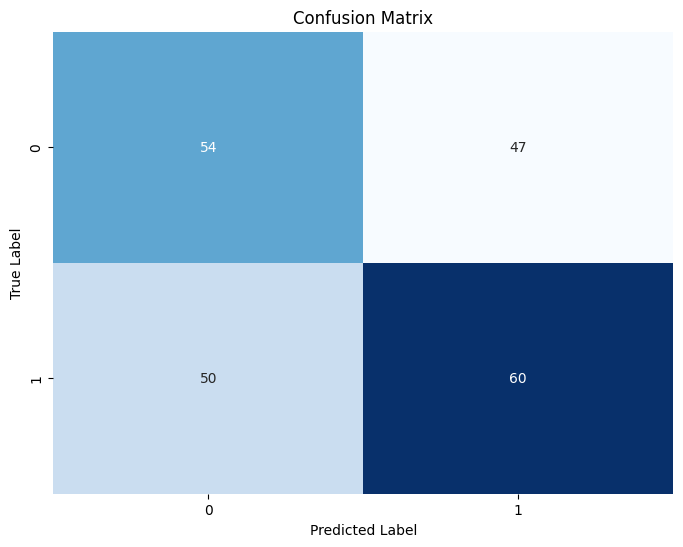

In [98]:
#Veo los True Positive, False Positive, True Negative, False Negative

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Precisión: 0.5607476635514018
ROC AUC Score: 0.573087308730873
ROC AUC Score: 0.573087308730873


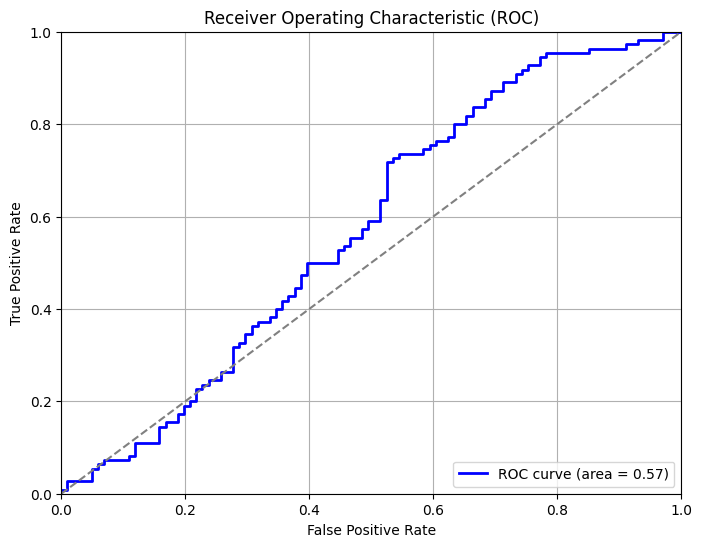

In [99]:
# Calculo la precisión
precision = precision_score(y_test, y_pred)
print("Precisión:", precision)

# Calculo el ROC AUC Score
y_pred_proba = RL_num.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# Calculo la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculo el área bajo la curva
roc_auc = auc(fpr, tpr)
print("ROC AUC Score:", roc_auc)


# Grafico la curva
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Arbol de desiciones solo con numeros

In [100]:
#creo el arbol de decicion y le meto las X e Y con las que entrenar
arbol_num = DecisionTreeClassifier()
arbol_num.fit(X_train, y_train)

#obtengo la prediccion de del modelo y la probabilidad de que las muestras pertenezcan al positivo
y_pred_arbol = arbol_num.predict(X_test)
y_pred_proba_arbol = arbol_num.predict_proba(X_test)[:, 1]

In [101]:
#me fijo cuales son los hiperparametros del arbol
max_depth = arbol_num.get_depth()
max_leaf_nodes = arbol_num.get_n_leaves()
min_samples_split = arbol_num.get_n_leaves()
min_leaf_samples = arbol_num.get_n_leaves()

print("Max Depth:", max_depth)
print("max_leaf_nodes:", max_leaf_nodes)
print("min_samples_split:", min_samples_split)
print("min_leaf_samples:", min_leaf_samples)

Max Depth: 15
max_leaf_nodes: 136
min_samples_split: 136
min_leaf_samples: 136


Precisión (arbol_num): 0.6021505376344086


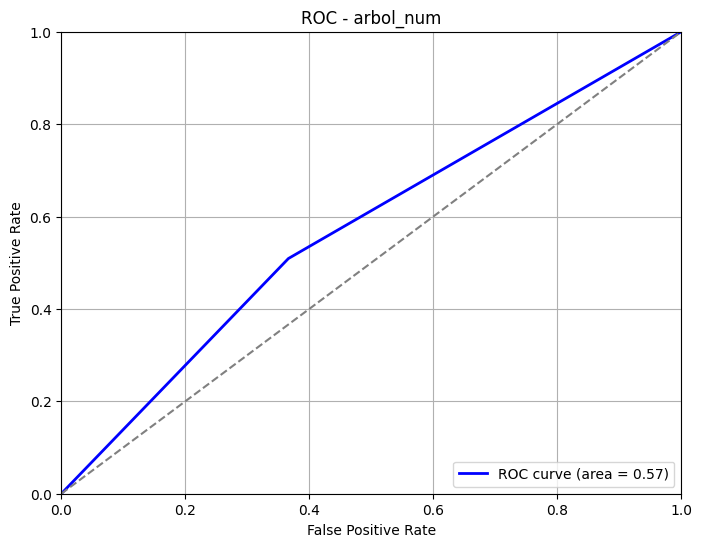

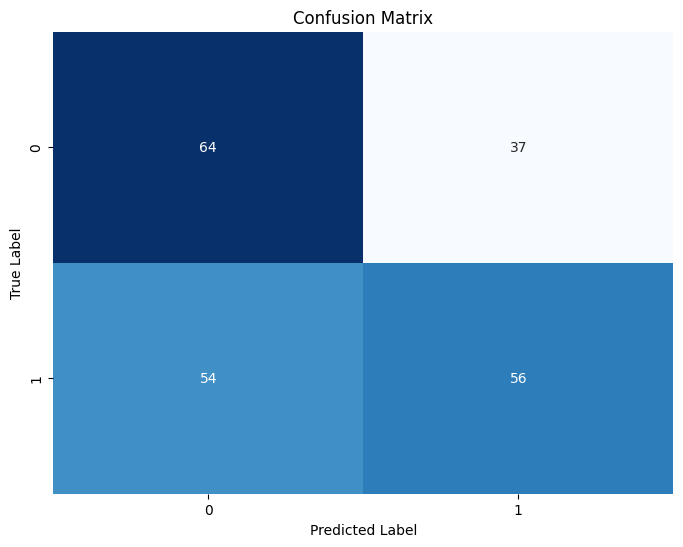

Importancia de Atributos (arbol_num):
EXT_SOURCE_3                  0.143550
EXT_SOURCE_1                  0.107922
EXT_SOURCE_2                  0.053498
DAYS_BIRTH                    0.052585
DAYS_EMPLOYED                 0.051780
                                ...   
FLAG_DOCUMENT_21              0.000000
AMT_REQ_CREDIT_BUREAU_DAY     0.000000
AMT_REQ_CREDIT_BUREAU_HOUR    0.000000
AMT_REQ_CREDIT_BUREAU_MON     0.000000
AMT_REQ_CREDIT_BUREAU_QRT     0.000000
Length: 105, dtype: float64


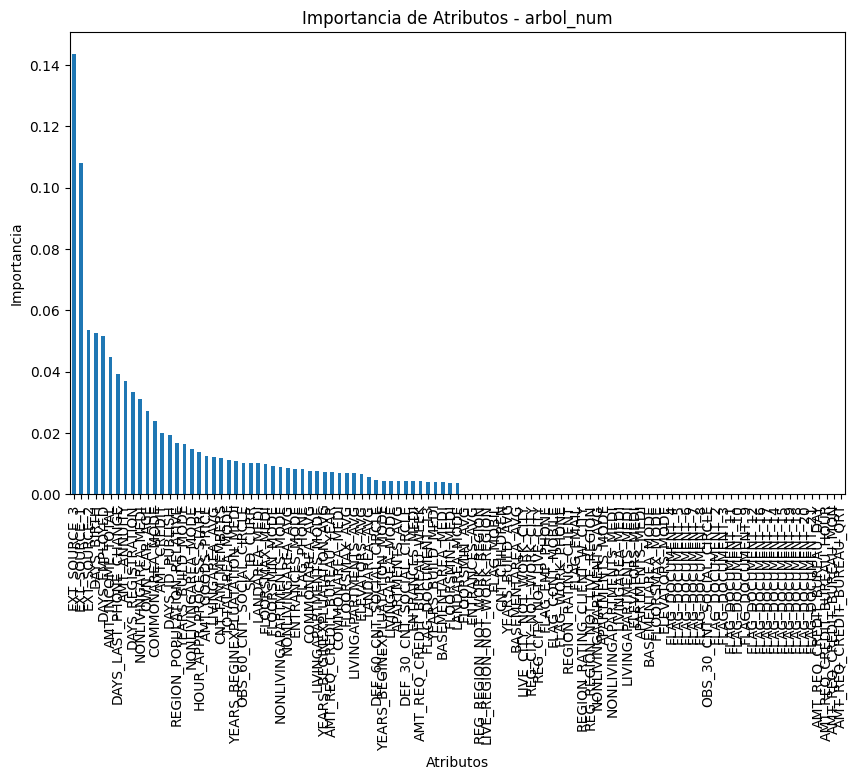

In [102]:
# Calculo la precisión
precision_arbol = precision_score(y_test, y_pred_arbol)
print("Precisión (arbol_num):", precision_arbol)

# Genero la curva ROC
fpr_arbol, tpr_arbol, _ = roc_curve(y_test, y_pred_proba_arbol)
roc_auc_arbol = auc(fpr_arbol, tpr_arbol)

# Grafico la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_arbol, tpr_arbol, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_arbol:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - arbol_num')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# hago una matriz de confucion para ver TP, FP, TN y FN
conf_matrix = confusion_matrix(y_test, y_pred_arbol)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# con feature importance, me fijo la importancia de cada columna
importances_arbol = arbol_num.feature_importances_
feature_names = X_train.columns
feature_importances_arbol = pd.Series(importances_arbol, index=feature_names).sort_values(ascending=False)

print("Importancia de Atributos (arbol_num):")
print(feature_importances_arbol)

# Grafico las importancias de arriba
plt.figure(figsize=(10, 6))
feature_importances_arbol.plot(kind='bar')
plt.title('Importancia de Atributos - arbol_num')
plt.xlabel('Atributos')
plt.ylabel('Importancia')
plt.show()

Con k-fold, busco crear un arbol de numeros mas preciso

In [103]:
#defino un rango de hiperparametros posibles
Hiperparametros = {
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}

# Hago una validacion de tipo K-Fold (divido el dataset en 5 partes)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Busco los mejores hiperparametros entre los que defini arriba
grid_search = GridSearchCV(estimator=arbol_num, param_grid=Hiperparametros, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)

# Ejecuto la busqueda
grid_search.fit(X_train, y_train)

# printeo los resultados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)


Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Mejores hiperparámetros encontrados: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


Transformacion de categoricos en numericos

In [104]:
# Busco las columnas categóricas
categorical_cols = balanced_ds.select_dtypes(include=['object', 'category']).columns

# Hago una copia para no modificar el dataset original
le_transformed_ds = balanced_ds.copy()

# Aplico LabelEncoder a cada columna categórica
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    le_transformed_ds[col] = le.fit_transform(le_transformed_ds[col])
    label_encoders[col] = le  # Guarda el LabelEncoder para futuras transformaciones

# Muestro las primeras filas para chequear que haya funcionado
print(le_transformed_ds.head())

   SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      406420       0                   1            1             0   
1      296707       1                   1            0             0   
2      145273       0                   0            1             0   
3      433095       1                   0            0             0   
4      313040       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             1           67500.0    180000.0       9000.0   
1                1             0           94500.0    180000.0       9000.0   
2                0             0          387000.0   1575000.0      65128.5   
3                1             0          126000.0    173196.0      14809.5   
4                0             0          157500.0    135000.0       9823.5   

   ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0  ...                 0    

Regesion logistica con categoricos (Label Encoding)

In [105]:
#me guardo una X e Y del nuevo dataset con categoricos creado arriba
x_LE = le_transformed_ds.drop(columns=['TARGET']) 
y_LE = le_transformed_ds[['TARGET']]

# Divido el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(x_LE, y_LE, test_size=0.2, random_state=42)

#creo el mmodelo de LR 
RL_LE = LogisticRegression()
RL_LE.fit(X_train, y_train)

C:\Users\mamak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mamak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
#Calculo el error cuadratico

error_cuadratico = mean_squared_error(y_test, y_pred)
error_cuadratico

np.float64(0.4597156398104265)

In [107]:
#Calculo el coeficiente

print("Coefficients:", RL_LE.coef_)
print("Intercept:", RL_LE.intercept_)

Coefficients: [[ 1.16947503e-06 -3.67494956e-08  3.28195797e-08  0.00000000e+00
  -6.03698041e-09 -4.02648405e-08 -2.85436178e-06  1.91390826e-06
   2.62424216e-05 -2.43218733e-06  9.46315772e-08  9.76067946e-08
   2.18571381e-07  3.40199611e-08  1.10065715e-07 -1.43763039e-10
   4.75465313e-06  1.82200493e-04 -3.77674835e-05  2.63156849e-05
   6.66153533e-07  8.36183491e-09  8.36183491e-09  3.31445365e-08
   8.50294844e-09  1.65298621e-08  2.09349746e-08  3.63887915e-07
  -5.94542312e-08  8.74687593e-08  8.35364979e-08  1.21837244e-07
  -3.12865685e-08  3.26318457e-09  4.58570409e-09  9.72221719e-09
   4.19667271e-09  1.12689679e-08  6.41850301e-09 -2.04585833e-07
  -5.37197254e-08 -4.42379717e-08 -6.62950852e-08 -5.45032411e-09
  -4.16848795e-09  7.48359609e-09 -3.46177833e-09 -2.84039213e-10
  -3.87893106e-09 -7.04913947e-10 -9.74785663e-09 -6.25648197e-09
   5.05040988e-09 -5.52989604e-09 -5.51799768e-09  2.58473862e-09
  -4.62622527e-10 -4.10694803e-09 -2.79739344e-09  7.54160674e

Precisión (RL_LE): 0.5607476635514018


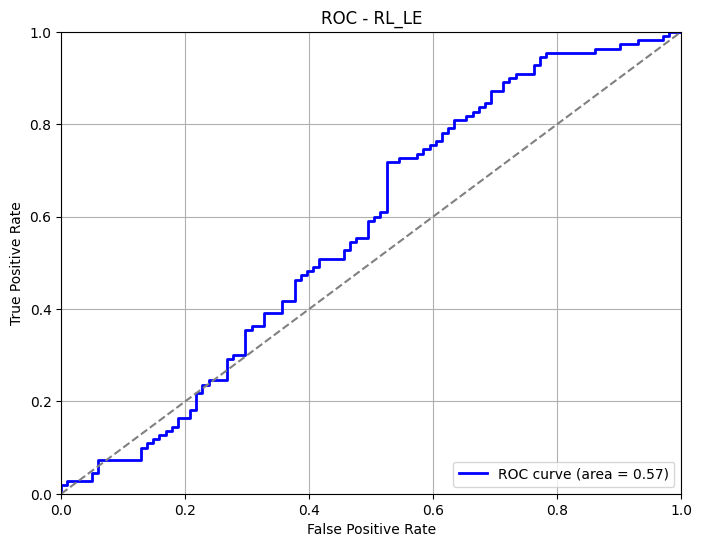

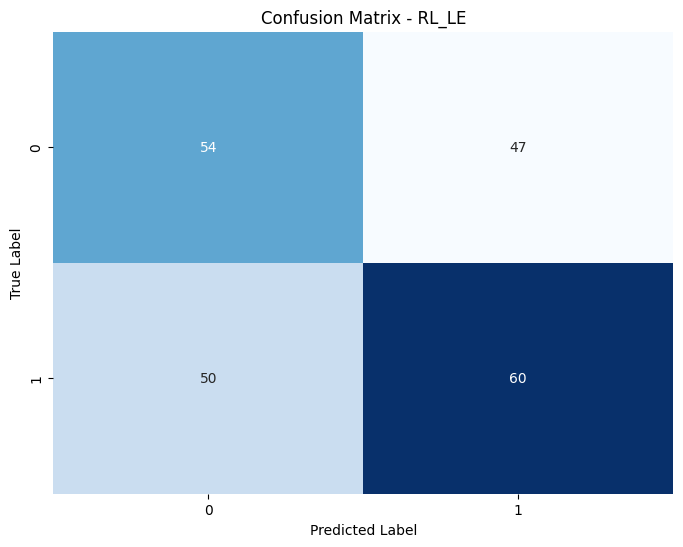

In [108]:

y_pred_rl_le = RL_LE.predict(X_test)
y_pred_proba_rl_le = RL_LE.predict_proba(X_test)[:, 1]

precision_rl_le = precision_score(y_test, y_pred_rl_le)
print("Precisión (RL_LE):", precision_rl_le)

fpr_rl_le, tpr_rl_le, _ = roc_curve(y_test, y_pred_proba_rl_le)
roc_auc_rl_le = auc(fpr_rl_le, tpr_rl_le)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rl_le, tpr_rl_le, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rl_le:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - RL_LE')
plt.legend(loc="lower right")
plt.grid()
plt.show()

conf_matrix_rl_le = confusion_matrix(y_test, y_pred_rl_le)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rl_le, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - RL_LE')
plt.show()

Arbol de desiciones con categoricos

Precisión (tree_LE): 0.5684210526315789


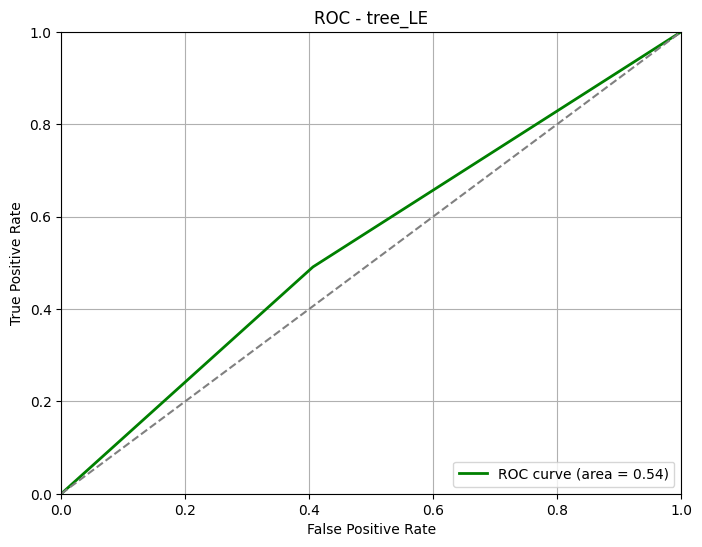

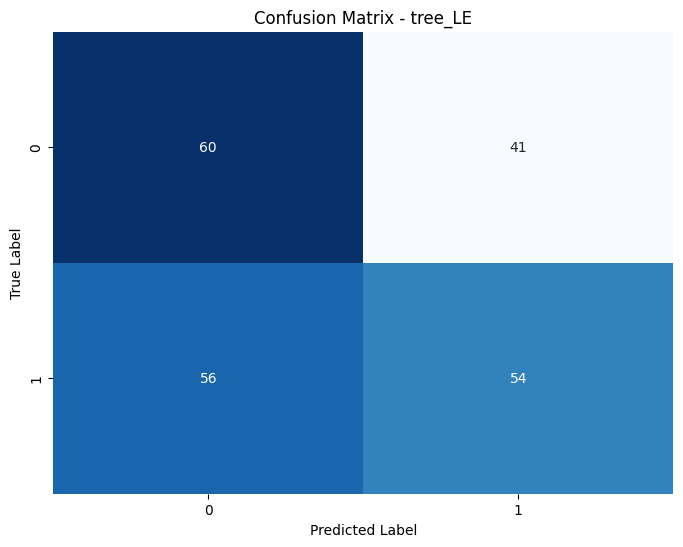

Importancia de Atributos (tree_LE):
EXT_SOURCE_3                  0.127008
EXT_SOURCE_1                  0.102004
DAYS_EMPLOYED                 0.051809
EXT_SOURCE_2                  0.043576
ORGANIZATION_TYPE             0.038600
                                ...   
FLAG_DOCUMENT_21              0.000000
AMT_REQ_CREDIT_BUREAU_DAY     0.000000
AMT_REQ_CREDIT_BUREAU_HOUR    0.000000
AMT_REQ_CREDIT_BUREAU_MON     0.000000
AMT_REQ_CREDIT_BUREAU_QRT     0.000000
Length: 121, dtype: float64


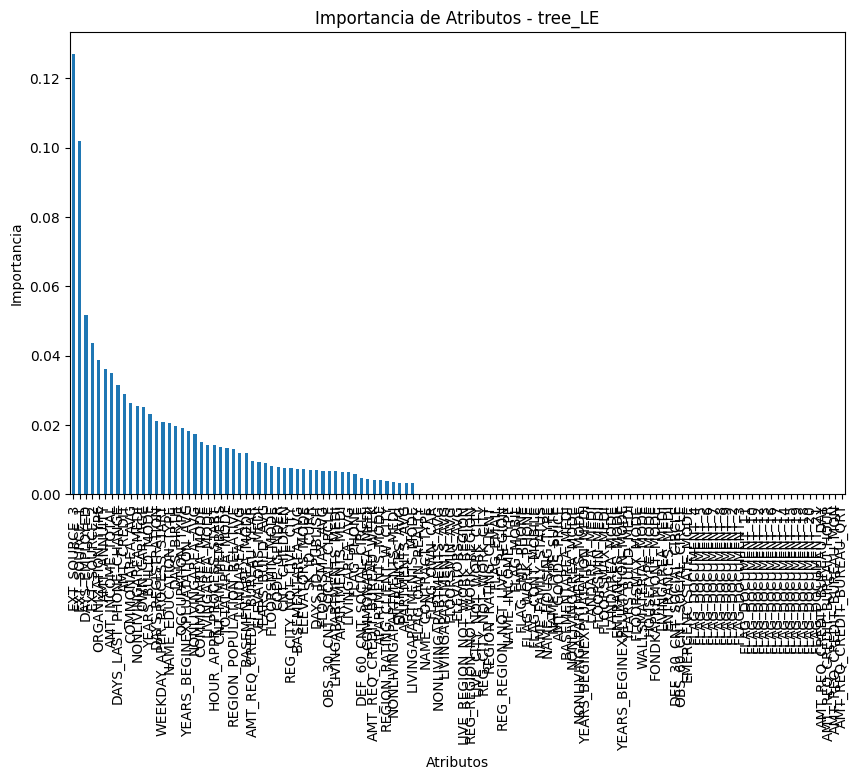

In [109]:

tree_LE = DecisionTreeClassifier(random_state=42)
tree_LE.fit(X_train, y_train)


y_pred_tree = tree_LE.predict(X_test)
y_pred_proba_tree = tree_LE.predict_proba(X_test)[:, 1]


precision_tree = precision_score(y_test, y_pred_tree)
print("Precisión (tree_LE):", precision_tree)


fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)


plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'ROC curve (area = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - tree_LE')
plt.legend(loc="lower right")
plt.grid()
plt.show()


conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - tree_LE')
plt.show()


importances_tree = tree_LE.feature_importances_
feature_importances_tree = pd.Series(importances_tree, index=X_train.columns).sort_values(ascending=False)

print("Importancia de Atributos (tree_LE):")
print(feature_importances_tree)


plt.figure(figsize=(10, 6))
feature_importances_tree.plot(kind='bar')
plt.title('Importancia de Atributos - tree_LE')
plt.xlabel('Atributos')
plt.ylabel('Importancia')
plt.show()


Arbol con categoricos y validacion K-Fold

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
Precisión (best_tree_LE): 0.640625


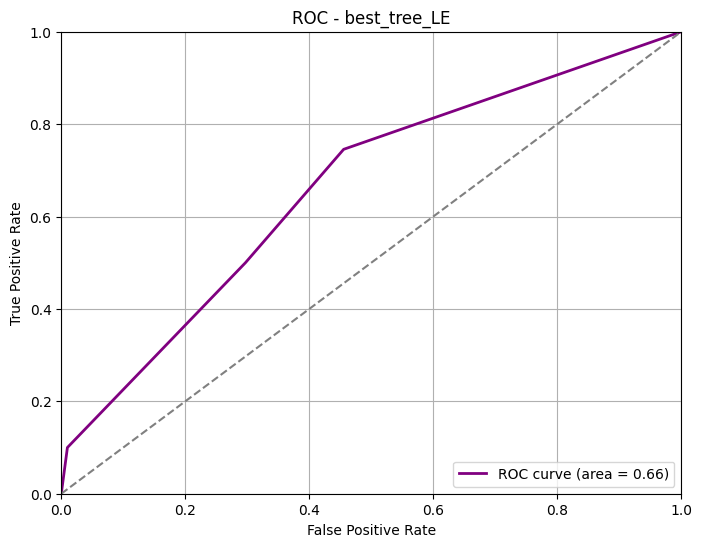

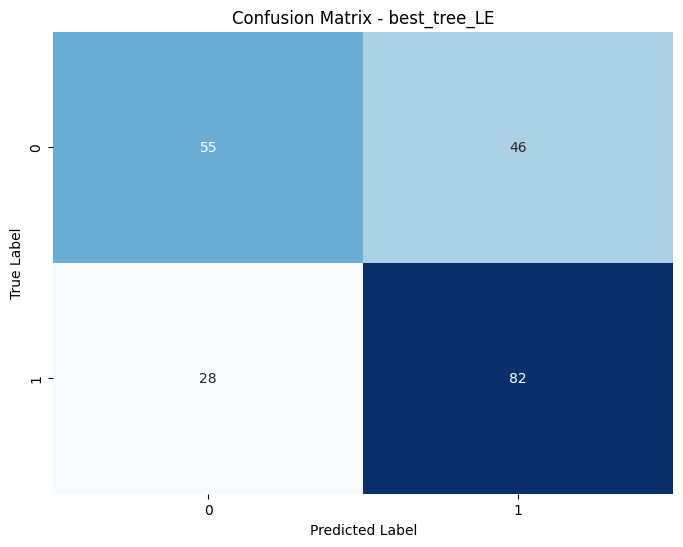

Importancia de Atributos (best_tree_LE):
EXT_SOURCE_3                  0.528553
EXT_SOURCE_1                  0.239528
EXT_SOURCE_2                  0.231918
NAME_CONTRACT_TYPE            0.000000
FLAG_OWN_REALTY               0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.000000
AMT_REQ_CREDIT_BUREAU_WEEK    0.000000
AMT_REQ_CREDIT_BUREAU_MON     0.000000
AMT_REQ_CREDIT_BUREAU_QRT     0.000000
AMT_REQ_CREDIT_BUREAU_YEAR    0.000000
Length: 121, dtype: float64


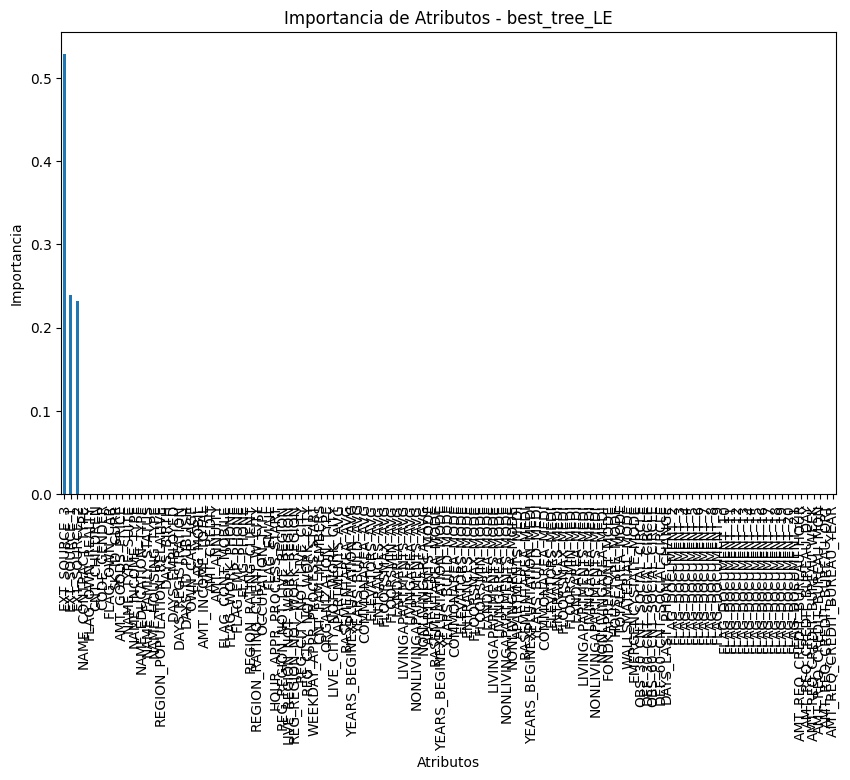

In [110]:
X_train, X_test, y_train, y_test = train_test_split(x_LE, y_LE, test_size=0.2, random_state=42)

# creo un arbol de decision
tree_model_perfecto = DecisionTreeClassifier(random_state=42)

# creo un grupo de hiperparámetros para explorar
param_grid = {
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy']
}

# Uso k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=tree_model_perfecto, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

# Ejecuto la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtengo el mejor modelo
best_tree_LE = grid_search.best_estimator_

# muestro los hiperparams
print("Mejores hiperparámetros:", grid_search.best_params_)

# Predigo en el conjunto de prueba con el mejor modelo
y_pred_best_tree_LE = best_tree_LE.predict(X_test)
y_pred_proba_best_tree_LE = best_tree_LE.predict_proba(X_test)[:, 1]

# Calculo la precisión
precision_best_tree_LE = precision_score(y_test, y_pred_best_tree_LE)
print("Precisión (best_tree_LE):", precision_best_tree_LE)

# Genero la curva ROC
fpr_best_tree_LE, tpr_best_tree_LE, _ = roc_curve(y_test, y_pred_proba_best_tree_LE)
roc_auc_best_tree_LE = auc(fpr_best_tree_LE, tpr_best_tree_LE)

# Grafico la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_tree_LE, tpr_best_tree_LE, color='purple', lw=2, label=f'ROC curve (area = {roc_auc_best_tree_LE:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - best_tree_LE')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Muestro la matriz de confusión usando seaborn heatmap
conf_matrix_best_tree_LE = confusion_matrix(y_test, y_pred_best_tree_LE)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_tree_LE, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - best_tree_LE')
plt.show()

# Importancia de los atributos
importances_best_tree_LE = best_tree_LE.feature_importances_
feature_importances_best_tree_LE = pd.Series(importances_best_tree_LE, index=X_train.columns).sort_values(ascending=False)

print("Importancia de Atributos (best_tree_LE):")
print(feature_importances_best_tree_LE)

# grafico importancia
plt.figure(figsize=(10, 6))
feature_importances_best_tree_LE.plot(kind='bar')
plt.title('Importancia de Atributos - best_tree_LE')
plt.xlabel('Atributos')
plt.ylabel('Importancia')
plt.show()

BONUS!!!!!!

Precisión (bonus_rf): 0.5974025974025974


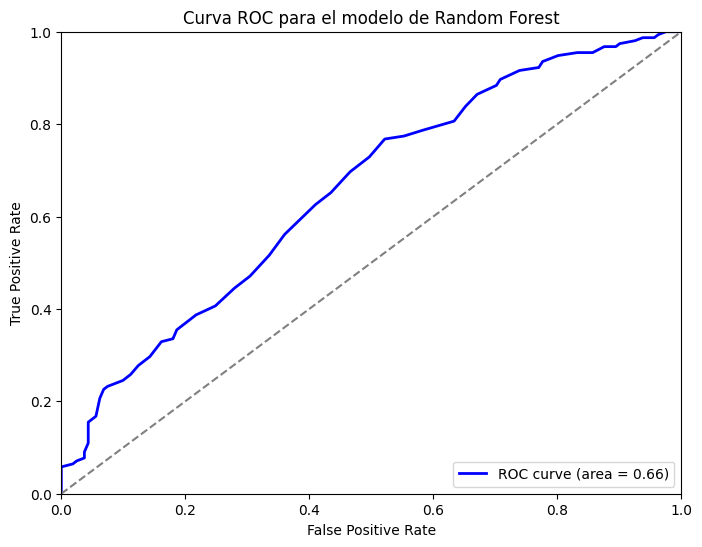

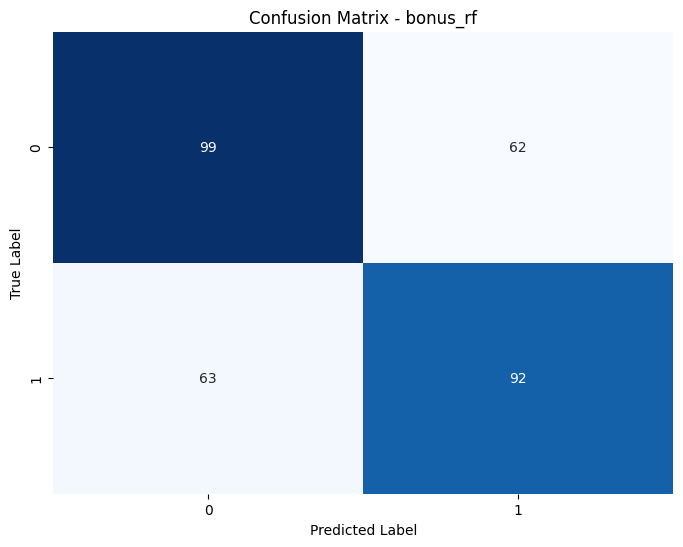

Importancia de Atributos (bonus_rf):
EXT_SOURCE_3        0.078747
EXT_SOURCE_1        0.044624
EXT_SOURCE_2        0.043509
DAYS_EMPLOYED       0.026671
AMT_ANNUITY         0.022448
                      ...   
FLAG_DOCUMENT_12    0.000000
FLAG_DOCUMENT_19    0.000000
FLAG_DOCUMENT_17    0.000000
FLAG_DOCUMENT_20    0.000000
FLAG_DOCUMENT_21    0.000000
Length: 121, dtype: float64


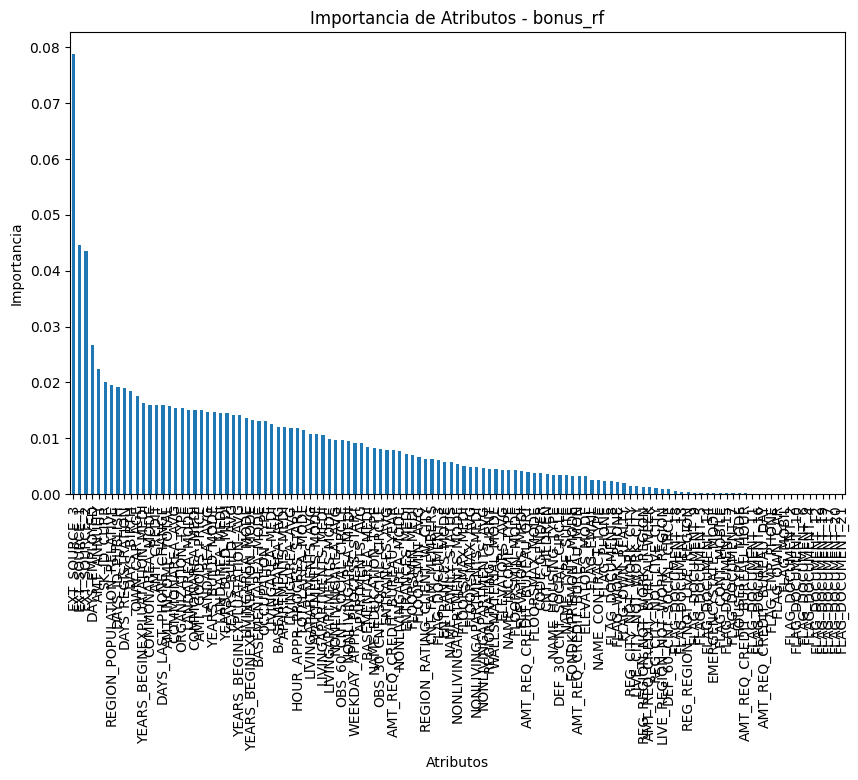

In [111]:
# Separo el dataset en características (X) y el objetivo (y)
X = le_transformed_ds.drop('TARGET', axis=1)  # Eliminar la columna objetivo
y = le_transformed_ds['TARGET']

# Divido el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creo y entreno el modelo de Random Forest
bonus_rf = RandomForestClassifier(random_state=42)
bonus_rf.fit(X_train, y_train)

# Hago una prediccion sobre el conjunto de prueba
y_pred_rf = bonus_rf.predict(X_test)

# Calculo la precisión del modelo de Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
print("Precisión (bonus_rf):", precision_rf)

# Obtengo las probabilidades predichas para la curva ROC
y_pred_proba_rf = bonus_rf.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Genero la curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Grafico la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para el modelo de Random Forest')
plt.legend(loc='lower right')
plt.show()

# matriz de confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - bonus_rf')
plt.show()

# Importancia de los atributos
importances_rf = bonus_rf.feature_importances_
feature_importances_rf = pd.Series(importances_rf, index=X_train.columns).sort_values(ascending=False)

print("Importancia de Atributos (bonus_rf):")
print(feature_importances_rf)

# grafico importancia
plt.figure(figsize=(10, 6))
feature_importances_rf.plot(kind='bar')
plt.title('Importancia de Atributos - bonus_rf')
plt.xlabel('Atributos')
plt.ylabel('Importancia')
plt.show()
